In [105]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import requests
from binance.client import Client
import pandas as pd

### Collect dataset

In [138]:
api_key = 'kaSdgDnLu7oKM7vjMVr9qVmoPVBxJ58HRAQqvabouYnNvlCKEhRTyRtOUeDRkpUK'
api_secret = 'pJJZYfpM1k4T3Wk1XZfasiIsGs1eEdBNObCdLlXZ6pnKnJ0Ulul0KYgyGradZHiY'
client = Client(api_key, api_secret)





symbol = 'BTCUSDT'
interval = Client.KLINE_INTERVAL_1HOUR

candles = []
for i in range(30):
    start_time = 1556463999 + 1500*3600*i # April 6, 2023, 23:59:59 (UTC)

    candles += client.futures_klines(symbol=symbol, interval=interval, startTime=start_time * 1000,  limit=1500)


df = pd.DataFrame(candles, columns=['Open time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'])

# Extract the relevant columns and convert them to appropriate data types
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].astype(float)
df['Open time'] = pd.to_datetime(df['Open time'], unit='ms')

# Set the 'Open time' column as the DataFrame's index
df.set_index('Open time', inplace=True)

df

,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,0.002,1567965599999,20,2,0.001,10,0
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,0.000,1567969199999,0,0,0,0,0
2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12,471.659,1567972799999,4879792.35614,562,0,0,0
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,583.271,1567976399999,6037732.62590,731,0.034,351.97117,0
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,689.759,1567979999999,7136798.50523,827,0.004,41.38500,0
...,...,...,...,...,...,...,...,...,...,...,...
2023-06-01 13:00:00,26929.80,26955.10,26855.00,26881.70,11831.226,1685627999999,318268604.56490,122760,5864.209,157761462.54480,0
2023-06-01 14:00:00,26881.80,26974.00,26817.60,26887.80,18027.068,1685631599999,484597059.11890,168989,9322.706,250634080.83260,0
2023-06-01 15:00:00,26887.90,26939.90,26844.20,26884.20,9506.636,1685635199999,255668838.65010,105861,4743.009,127564513.72050,0


In [139]:
prices = df[['Open', 'High','Low','Close']].replace({',':''}, regex=True).astype(np.float64)
prices

,Open,High,Low,Close
Open time,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00
2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90
...,...,...,...,...
2023-06-01 13:00:00,26929.80,26955.10,26855.00,26881.70
2023-06-01 14:00:00,26881.80,26974.00,26817.60,26887.80
2023-06-01 15:00:00,26887.90,26939.90,26844.20,26884.20


In [140]:
predicted_prices = prices['Close'][1:]
data = prices.copy()[:-1]
data['target'] = np.int32( np.array(predicted_prices)>=data['Close'] ) #whether price will go up or down
data

,Open,High,Low,Close,target
Open time,,,,,
2019-09-08 17:00:00,10000.00,10000.00,10000.00,10000.00,1
2019-09-08 18:00:00,10000.00,10000.00,10000.00,10000.00,1
2019-09-08 19:00:00,10344.77,10357.53,10337.43,10340.12,1
2019-09-08 20:00:00,10340.12,10368.64,10334.54,10351.42,1
2019-09-08 21:00:00,10351.42,10391.90,10324.77,10391.90,0
...,...,...,...,...,...
2023-06-01 12:00:00,26881.60,26960.00,26773.20,26929.90,0
2023-06-01 13:00:00,26929.80,26955.10,26855.00,26881.70,1
2023-06-01 14:00:00,26881.80,26974.00,26817.60,26887.80,0


In [150]:
import gudhi
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

class predictor:
    def __init__(self, data, k = 20, max_dim=2, threshold=3):
        self.max_dim = max_dim
        self.k = k
        self.threshold = threshold
        self.R = np.linspace(0, threshold, k)
        self.images = []


        # Define the model architecture
        model = tf.keras.Sequential([
            layers.Reshape((k, k, 1), input_shape=(k, k)),  # Reshape input to (20, 20, 1)
            layers.Conv2D(4, 3, activation='relu'),           # Convolutional layer with 16 filters
            layers.MaxPooling2D(2),                            # Max pooling layer
            layers.Flatten(),                                  # Flatten the output
            layers.Dense(12, activation='relu'),               # Dense layer with 32 units
            layers.Dense(1, activation='sigmoid')              # Output layer with sigmoid activation
        ])

        # Compile the model
        model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
        self.model = model

    def persistent_analysis(self, data):
        rips_complex = gudhi.RipsComplex(points=data)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=self.max_dim)
        diag = simplex_tree.compute_persistence()
        simplices = list(simplex_tree.get_simplices())
        simplices = [i for i in simplices if i[1]<self.threshold]
        simplices.sort(key=lambda x: x[1])
        simplices = simplices[len(data):]
        return simplices
    
    def analysis_to_image(self, simplices):
        i = 0
        image = np.zeros((len(self.R), self.k))
        for j in range(len(simplices)):
            if self.R[i+1]<simplices[j][1]:
                i+=1
            d = len( simplices[j][0] )
            for point in simplices[j][0]:
                image[i][point] += d
        return image
    
    def fit(self, data, epochs=5):
        X=[]
        k = self.k
        for i in range(k-1, len(data)):
            x = np.array( data.iloc[i-k+1:i+1, :4] )
            x -= np.min(x)
            x /= np.max(x)
            tmp = np.zeros((k,5))
            tmp[:,:-1] = x
            tmp[:,-1] = list(range(k))
            X.append( tmp )

        y = data.iloc[k-1:,-1]

        self.X = np.array(X)
        self.images += [self.analysis_to_image(self.persistent_analysis(x)) for x in X]
        self.model.fit( np.array(self.images), y, epochs=epochs)

    def predict(self, data):
        X=[]
        k = self.k
        for i in range(k-1, len(data)):
            x = np.array( data.iloc[i-k+1:i+1, :4] )
            x -= np.min(x)
            x /= np.max(x)
            tmp = np.zeros((k,5))
            tmp[:,:-1] = x
            tmp[:,-1] = list(range(k))
            X.append( tmp )

        y = data.iloc[k-1:,-1]

        X = np.array(X)
        X = np.array([self.analysis_to_image(self.persistent_analysis(x)) for x in X])

        return self.model.predict(  X, y )
    
    def evaluate(self, data):
        X=[]
        k = self.k
        for i in range(k-1, len(data)):
            x = np.array( data.iloc[i-k+1:i+1, :4] )
            x -= np.min(x)
            x /= np.max(x)
            tmp = np.zeros((k,5))
            tmp[:,:-1] = x
            tmp[:,-1] = list(range(k))
            X.append( tmp )

        y = data.iloc[k-1:,-1]

        X = np.array(X)
        X = np.array([self.analysis_to_image(self.persistent_analysis(x)) for x in X])
        return self.model.evaluate(X,y)

    



        
        

model = predictor(data, k=30, max_dim=2, threshold=4)

n = int(0.9*len(data))
TRAIN, TEST  = data[:n], data[n:]
model.fit(TRAIN, epochs = 10)

model.evaluate(TEST)

Epoch 1/10
1009/1009 [==============================] - 4s 3ms/step - loss: 0.7074 - accuracy: 0.5005
Epoch 2/10
1009/1009 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 3/10
1009/1009 [==============================] - 4s 4ms/step - loss: 0.6932 - accuracy: 0.4992
Epoch 4/10
1009/1009 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5039
Epoch 5/10
1009/1009 [==============================] - 3s 3ms/step - loss: 0.6932 - accuracy: 0.5023
Epoch 6/10
1009/1009 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5024
Epoch 7/10
1009/1009 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5016
Epoch 8/10
1009/1009 [==============================] - 3s 3ms/step - loss: 0.6931 - accuracy: 0.5039
Epoch 9/10
1009/1009 [==============================] - 4s 4ms/step - loss: 0.6932 - accuracy: 0.5039
Epoch 10/10
112/112 [==============================] - 0s 2ms/step - loss: 0.6930 

[0.692963719367981, 0.5134831666946411]

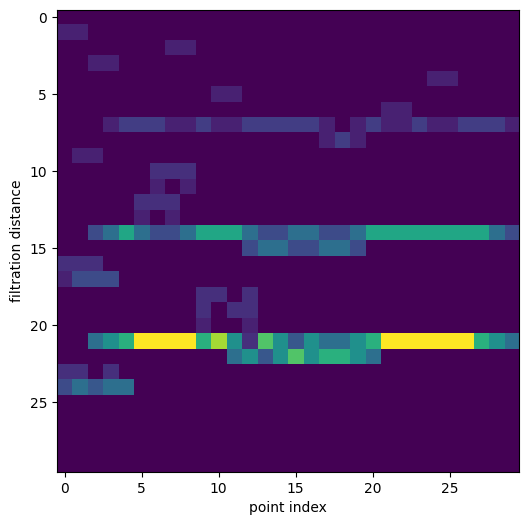

In [151]:
plt.figure(figsize= (6,6) )
plt.ylabel('filtration distance')
plt.xlabel('point index')
plt.imshow( model.images[0] )

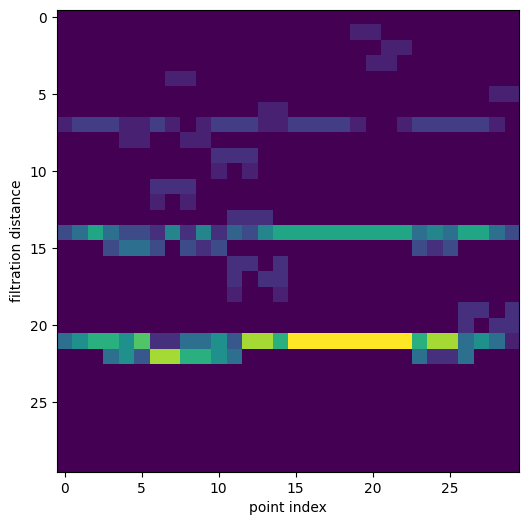

In [152]:
plt.figure(figsize= (6,6) )
plt.ylabel('filtration distance')
plt.xlabel('point index')
plt.imshow( model.images[-1] )